In [1]:
import sys, os, time, glob
import numpy as np
from datetime import datetime
from statistics import median
import matplotlib.pyplot as plt
# import statsmodels.api as sm
import csv
from csv import writer
from csv import reader
import pandas as pd 

In [2]:
dir_name = '/lcrc/project/EE-ECP/jkoo/code/ytopt/ytopt/benchmark/polybench-exp'
dir_name_gptune = '/lcrc/project/EE-ECP/jkoo/code/gptune/examples'
kernel = 'covariance'
kernel_dir = 'covariance'
d_sizes = ['sm','ml','xl']

tag1 = ''#_1.96_gp'# '_1.96_lcb'# 
tag2 = ''#_1.96_gp_n30'# '_11.0_lcb' # 
tag3 = ''#_sla_re'

real_s = pd.read_csv(f'{dir_name}/{kernel}/results_rf_{d_sizes[0]}_{kernel}{tag1}.csv')
real_m = pd.read_csv(f'{dir_name}/{kernel}/results_rf_{d_sizes[1]}_{kernel}{tag1}.csv')
real_l = pd.read_csv(f'{dir_name}/{kernel}/results_rf_{d_sizes[2]}_{kernel}{tag1}.csv')

real_s_rs = pd.read_csv(f'{dir_name}/{kernel}/results_rs_{d_sizes[0]}_{kernel}{tag1}.csv')
real_m_rs = pd.read_csv(f'{dir_name}/{kernel}/results_rs_{d_sizes[1]}_{kernel}{tag1}.csv')
real_l_rs = pd.read_csv(f'{dir_name}/{kernel}/results_rs_{d_sizes[2]}_{kernel}{tag1}.csv')

real_s_sdv = pd.read_csv(f'{dir_name}/{kernel}/results_sdv_{d_sizes[0]}_{kernel}{tag1}.csv')
real_m_sdv = pd.read_csv(f'{dir_name}/{kernel}/results_sdv_{d_sizes[1]}_{kernel}{tag1}.csv')
real_l_sdv = pd.read_csv(f'{dir_name}/{kernel}/results_sdv_{d_sizes[2]}_{kernel}{tag1}.csv')

# real_s_rs = pd.read_csv('./'+kernel_dir+'/results_rs_s_'+kernel+tag2+'.csv')
# real_m_rs = pd.read_csv('./'+kernel_dir+'/results_rs_m_'+kernel+tag2+'.csv')
# real_l_rs = pd.read_csv('./'+kernel_dir+'/results_rs_l_'+kernel+tag2+'.csv')


real_s_gp = pd.read_csv(f'{dir_name_gptune}/{kernel}_exp/{kernel}_gptune_dtla/TLA_experiments/SLA-GPTune-{d_sizes[0]}-tl/results.csv')
real_m_gp = pd.read_csv(f'{dir_name_gptune}/{kernel}_exp/{kernel}_gptune_dtla/TLA_experiments/SLA-GPTune-{d_sizes[1]}-tl/results.csv')
real_l_gp = pd.read_csv(f'{dir_name_gptune}/{kernel}_exp/{kernel}_gptune_dtla/TLA_experiments/SLA-GPTune-{d_sizes[2]}-tl/results.csv')

# real_s_gp_sla = pd.read_csv('./'+kernel_dir+'/results_gptune_s_'+kernel+'_sla.csv')
# real_m_gp_sla = pd.read_csv('./'+kernel_dir+'/results_gptune_m_'+kernel+'_sla.csv')
# real_l_gp_sla = pd.read_csv('./'+kernel_dir+'/results_gptune_l_'+kernel+'_sla.csv')


In [3]:
speedup_s =  real_s['objective'].astype(float)
speedup_m =  real_m['objective'].astype(float)
speedup_l =  real_l['objective'].astype(float)

speedup_s_rs =  real_s_rs['objective'].astype(float)
speedup_m_rs =  real_m_rs['objective'].astype(float)
speedup_l_rs =  real_l_rs['objective'].astype(float)

speedup_s_sdv =  real_s_sdv['exe_time'].astype(float)
speedup_m_sdv =  real_m_sdv['exe_time'].astype(float)
speedup_l_sdv =  real_l_sdv['exe_time'].astype(float)

speedup_s_gp =  real_s_gp['objective'].astype(float)
speedup_m_gp =  real_m_gp['objective'].astype(float)
speedup_l_gp =  real_l_gp['objective'].astype(float)

# speedup_s_gp_sla =  real_s_gp_sla['objective'].astype(float)
# speedup_m_gp_sla =  real_m_gp_sla['objective'].astype(float)
# speedup_l_gp_sla =  real_l_gp_sla['objective'].astype(float)

In [4]:
gathered = []

# gathered.append([speedup_s,speedup_s_gp,speedup_s_gp_sla])
# gathered.append([speedup_m,speedup_m_gp,speedup_m_gp_sla])
# gathered.append([speedup_l,speedup_l_gp,speedup_l_gp_sla])

# gathered.append([speedup_s,speedup_s_rs,speedup_s_gp])
# gathered.append([speedup_m,speedup_m_rs,speedup_m_gp])
# gathered.append([speedup_l,speedup_l_rs,speedup_l_gp])

gathered.append([speedup_s,speedup_s_rs,speedup_s_sdv,speedup_s_gp])
gathered.append([speedup_m,speedup_m_rs,speedup_s_sdv,speedup_m_gp])
gathered.append([speedup_l,speedup_l_rs,speedup_s_sdv,speedup_l_gp])

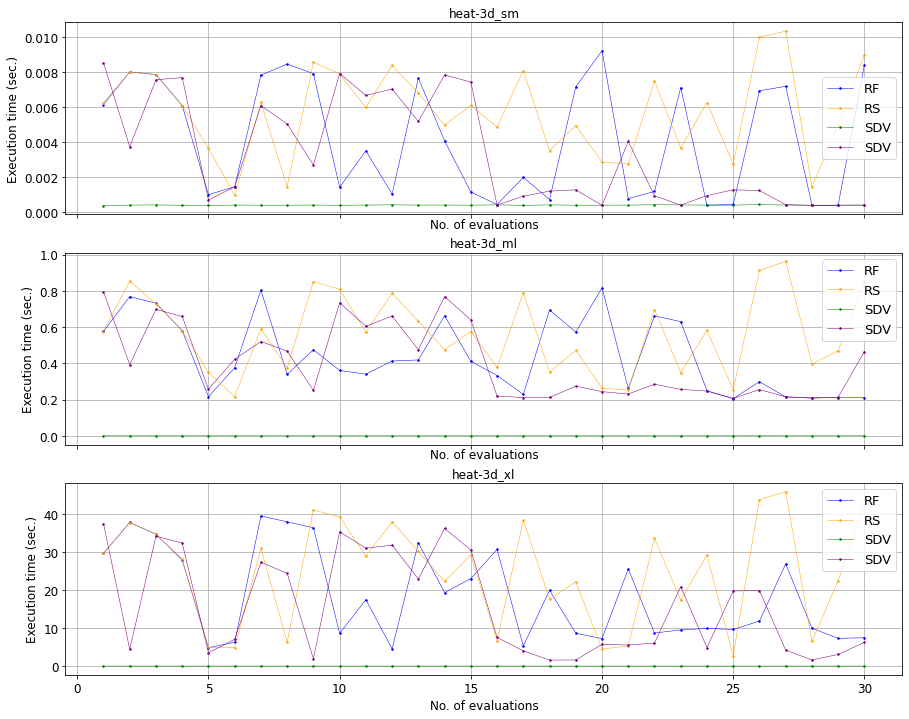

In [6]:
fig, axs = plt.subplots(3,1, figsize=(15, 12), sharex=True, sharey=False)
# kernel = 'heat-3d'
for ax, d_size, speedups in zip(axs.flat,['sm','ml','xl'],gathered):
# for cc in gathered:
#     ax.scatter(*np.random.normal(size=(2,200)))
#     ax.set_title(kernel+d_size,fontsize=14)
#     dict_s = cc
#     #     dict_s['-O3 Polly'] = [0] *1000
    for i, speedup in zip(['rf','rs','sdv','gt'],speedups):
        if i == 'rf':
            k = 'RF'
            color = 'blue'
        if i == 'rs':
            k = 'RS'
            color = 'orange'
        if i == 'sdv':
            k = 'SDV'
            color = 'green'
        if i == 'gt':
            k = 'SDV'
            color = 'purple'
        v = speedup.values    
        ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        # NOTE: changed `range(1, 4)` to mach actual values count
    ax.legend(fontsize=13)#,loc='center right')  # To draw legend
    #     plt.title(k_name[:-1],fontsize=14)
    # plt.xlim(0,max_exp+10)
    #     plt.ylim(bottom=0.5)
#     ax.set_ylabel('Execution time (sec.)', fontsize=12)
    ax.set_ylabel('Execution time (sec.)', fontsize=12)
    ax.set_xlabel('No. of evaluations', fontsize=12)
    ax.set_title(kernel+'_'+d_size,fontsize=12)
    ax.tick_params(axis="x", labelsize=12) 
    ax.tick_params(axis="y", labelsize=12) 
#     ax.set_xticklabels(fontsize=14)
#     ax.set_yticklabels(fontsize=14)
#     if d_size == 'sm':
#         k = 'GPTune TLA1'
#         color = 'purple'
# #         v = [0.163] #* len(v)
#         v = [0.8985] #* len(v) 9.393915,15.09887
#         v = [9.393915] #* len(v) ,
#         ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.1,markersize=10,color=color)
#         ax.axhline(y=v, color='purple', linestyle=':')
# #         ax.set_ylim((0.16,0.2))
#     if d_size == 'ml':
#         k = 'GPTune TLA1'
#         color = 'purple'
# #         v = [0.8192] #* len(v)
#         v = [1.8721] #* len(v)
#         v = [15.09887] #* len(v)
#         ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.1,markersize=10,color=color)
#         ax.axhline(y=v, color='purple', linestyle=':')
# #         ax.set_ylim((0.8,1.0))
#     if d_size == 'xl':
#         k = 'GPTune TLA1'
#         color = 'purple'
# #         v = [3.2781] #* len(v)
#         v = [4.8765] #* len(v)
#         ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.1,markersize=10,color=color)
#         ax.axhline(y=v, color='purple', linestyle=':')
# #         ax.set_ylim((3.2,3.5))      
    ax.grid()
#     plt.show()

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 3), sharex=True, sharey=True)
kernel = 'xsbench_M_'
for ax, d_size, speedups in zip(axs.flat,['1.96 LCB','11.0 LCB','19.6 LCB'],gathered):
# for cc in gathered:
#     ax.scatter(*np.random.normal(size=(2,200)))
#     ax.set_title(kernel+d_size,fontsize=14)
#     dict_s = cc
#     #     dict_s['-O3 Polly'] = [0] *1000
    for i, speedup in zip(range(len(speedups)),speedups):
        if i == 0:
            k = ''
            color = 'green'
            v = speedup.values    
            ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        if i == 2:
            k = ''
            color = 'blue'
            v = speedup.values    
            ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        if i == 2:
            k = ''
            color = 'orange'
            v = speedup.values    
            ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        # NOTE: changed `range(1, 4)` to mach actual values count
    ax.legend(fontsize=13)#,loc='center right')  # To draw legend
    #     plt.title(k_name[:-1],fontsize=14)
    # plt.xlim(0,max_exp+10)
    #     plt.ylim(bottom=0.5)
#     ax.set_ylabel('Execution time (sec.)', fontsize=12)
#     ax.set_ylabel('Execution time (sec.)', fontsize=12)
    ax.set_ylabel('Runtime', fontsize=12)
    ax.set_xlabel('No. of evaluations', fontsize=12)
    ax.set_title(kernel+d_size,fontsize=12)
    ax.tick_params(axis="x", labelsize=12) 
    ax.tick_params(axis="y", labelsize=12) 
#     ax.set_xticklabels(fontsize=14)
#     ax.set_yticklabels(fontsize=14)
    ax.grid()
#     plt.show()

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 3), sharex=True, sharey=True)
kernel = 'xsbench_cpu_'
for ax, d_size, speedups in zip(axs.flat,['M','M','M'],gathered):
# for cc in gathered:
#     ax.scatter(*np.random.normal(size=(2,200)))
#     ax.set_title(kernel+d_size,fontsize=14)
#     dict_s = cc
#     #     dict_s['-O3 Polly'] = [0] *1000
    for i, speedup in zip(range(len(speedups)),speedups):
        if i == 0:
            k = 'ytopt/BO'
            color = 'green'
            v = speedup.values    
            ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        if i == 22:
            k = 'GPTune '
            color = 'blue'
            v = speedup.values    
            ax.plot(range(1, len(v) + 1), v, '.-', label=k,linewidth=0.5,markersize=3,color=color)
        # NOTE: changed `range(1, 4)` to mach actual values count
    ax.legend(fontsize=13)#,loc='center right')  # To draw legend
    #     plt.title(k_name[:-1],fontsize=14)
    # plt.xlim(0,max_exp+10)
    #     plt.ylim(bottom=0.5)
#     ax.set_ylabel('Execution time (sec.)', fontsize=12)
#     ax.set_ylabel('Execution time (sec.)', fontsize=12)
    ax.set_ylabel('Runtime', fontsize=12)
    ax.set_xlabel('No. of evaluations', fontsize=12)
    ax.set_title(kernel+d_size,fontsize=12)
    ax.tick_params(axis="x", labelsize=12) 
    ax.tick_params(axis="y", labelsize=12) 
#     ax.set_xticklabels(fontsize=14)
#     ax.set_yticklabels(fontsize=14)
    ax.grid()
#     plt.show()

In [ ]:
x = real_s_rs['p0']
y = real_s_rs['objective']

In [ ]:
plt.scatter(x,y)
plt.xlabel('number of threads')
plt.ylabel('Runtime')
plt.title('XSBench CPU RS medium')

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(real_l_rs.corr(), annot=True)

In [ ]:

pd.plotting.scatter_matrix(real_l_rs, marker='+')
# real_l_rs.figure(figsize=(15, 10))

In [ ]:
input_sizes = {}
input_sizes['s']  = [100000] 
input_sizes['sm'] = [500000]
input_sizes['m']  = [1000000]
input_sizes['ml'] = [2500000]
input_sizes['l']  = [5000000]
input_sizes['xl'] = [10000000]

# input_sizes['s']  = [10000000] 
# input_sizes['sm'] = [50000000]
# input_sizes['m']  = [100000000]
# input_sizes['ml'] = [150000000]
# input_sizes['l']  = [200000000]
# input_sizes['xl'] = [500000000]

o3p_time = {}
# o3p_time['s']  = [0.297755] ## 0.34313150000000003  [0., 3.258446, 16.2930585]
o3p_time['s']  = [0.3243315] ## 
o3p_time['sm'] = [1.506179]
# o3p_time['m']  = [3.00738]  ## 
o3p_time['m']  = [3.258446]  ## 
o3p_time['ml'] = [7.544698]
# o3p_time['l']  = [15.0962] ## 
o3p_time['l']  = [16.2930585] ## 
o3p_time['xl'] = [30.0485]
o3p_time = {}
o3p_time['s']  = [1] 
o3p_time['sm'] = [1]
o3p_time['m']  = [1] 
o3p_time['ml'] = [1]
o3p_time['l']  = [1]
o3p_time['xl'] = [1]

In [ ]:
# speedup_s = o3p_time['s'][0] / real_s['objective'].astype(float)
# speedup_m = o3p_time['m'][0] / real_m['objective'].astype(float)
# speedup_l = o3p_time['l'][0] / real_l['objective'].astype(float)

# speedup_s_rs = o3p_time['s'][0] / real_s_rs['objective'].astype(float)
# speedup_m_rs = o3p_time['m'][0] / real_m_rs['objective'].astype(float)
# speedup_l_rs = o3p_time['l'][0] / real_l_rs['objective'].astype(float)

# speedup_s_gp = o3p_time['s'][0] / real_s_gp['objective'].astype(float)
# speedup_m_gp = o3p_time['m'][0] / real_m_gp['objective'].astype(float)
# speedup_l_gp = o3p_time['l'][0] / real_l_gp['objective'].astype(float)

# speedup_s_gp_sla = o3p_time['s'][0] / real_s_gp_sla['objective'].astype(float)
# speedup_m_gp_sla = o3p_time['m'][0] / real_m_gp_sla['objective'].astype(float)
# speedup_l_gp_sla = o3p_time['l'][0] / real_l_gp_sla['objective'].astype(float)